### Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Loading Data file

In [3]:
Final = pd.read_excel('final_data.xlsx')

In [4]:
Final.head()

,EmployeeNo,CurrentStatus,EmployeePosition,ProfitCenter,EmployeeCategory,Supervisorname,TotalHours_year_16-17,TotalAvailableHours_year_16-17,WorkHours_year_16-17,LeaveHours_year_16-17,TrainingHours_year_16-17,TotalHours_year_17-18,TotalAvailableHours_year_17-18,WorkHours_year_17-18,LeaveHours_year_17-18,TrainingHours_year_17-18,BDHours_year_17-18,NCHours_year_17-18,Utilization%_year_17-18,Tenure
0,1,Active,Others,PC - 1,SVP/VP,Others,2088,1802.0,636.0,216.0,70.0,2080,1864.5,448.0,188,27.5,1431.5,18.0,0.240279,18
1,2,Active,Level 2,PC - 2,SVP/VP,Others,2088,1882.0,555.5,156.0,50.0,2080,1868.0,722.0,208,4.0,600.5,596.5,0.386510,19
2,3,Active,Level 2,PC - 2,SVP/VP,Others,2088,1898.5,1004.5,144.0,45.5,2080,1720.0,1173.0,338,22.0,463.5,357.5,0.681977,17
3,4,Resigned,Level 2,PC - 3,Resigned,Others,2088,1851.0,273.0,208.0,29.0,1840,1640.5,273.0,196,3.5,1361.0,24.0,0.166413,18
4,5,Active,Others,Others,Others,Others,1312,1205.0,149.0,104.0,3.0,1312,1205.0,149.0,104,3.0,1159.0,818.0,0.123651,20


### Standard-Scaler

In [5]:
from sklearn.preprocessing import StandardScaler

# Standard-Scaler
for column in Final.columns:
    if column != 'EmployeeNo' and column != 'CurrentStatus':
        if Final[column].dtype != 'O':
            scaler = StandardScaler()
            Final[column] = scaler.fit_transform(Final[[column]])

In [6]:
Final.head()

,EmployeeNo,CurrentStatus,EmployeePosition,ProfitCenter,EmployeeCategory,Supervisorname,TotalHours_year_16-17,TotalAvailableHours_year_16-17,WorkHours_year_16-17,LeaveHours_year_16-17,TrainingHours_year_16-17,TotalHours_year_17-18,TotalAvailableHours_year_17-18,WorkHours_year_17-18,LeaveHours_year_17-18,TrainingHours_year_17-18,BDHours_year_17-18,NCHours_year_17-18,Utilization%_year_17-18,Tenure
0,1,Active,Others,PC - 1,SVP/VP,Others,0.831189,0.783878,-0.564384,0.369121,0.964619,0.767306,0.837993,-0.915011,0.074011,0.024483,5.514604,-0.835467,-1.322445,5.678544
1,2,Active,Level 2,PC - 2,SVP/VP,Others,0.831189,0.914711,-0.692825,-0.034566,0.379800,0.767306,0.843859,-0.492141,0.197786,-0.795030,2.172403,0.677328,-0.922196,6.050117
2,3,Active,Level 2,PC - 2,SVP/VP,Others,0.831189,0.941696,0.023571,-0.115303,0.248216,0.767306,0.595811,0.203898,1.002326,-0.167318,1.621402,0.052336,-0.113469,5.306971
3,4,Resigned,Level 2,PC - 3,Resigned,Others,0.831189,0.864013,-1.143565,0.315296,-0.234260,0.408610,0.462569,-1.185093,0.123521,-0.812466,5.231059,-0.819777,-1.524625,5.678544
4,5,Active,Others,Others,Others,Others,-0.305623,-0.192467,-1.341411,-0.384428,-0.994524,-0.380522,-0.267330,-1.376465,-0.445846,-0.829903,4.418635,1.256557,-1.641667,6.421690


### Encoding

In [7]:
# Encoding Categorical variable 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(),[2,3,4,5])],
    remainder="passthrough"
)
Final_encoded = ct.fit_transform(Final)

In [8]:
# Create a DataFrame from Final_encoded using the column names from ct.get_feature_names_out()
Final = pd.DataFrame(Final_encoded, columns=ct.get_feature_names_out())

In [9]:
Final.head()

,encoder__EmployeePosition_Level 2,encoder__EmployeePosition_Level 3,encoder__EmployeePosition_Level 4,encoder__EmployeePosition_Level 5,encoder__EmployeePosition_Level 6,encoder__EmployeePosition_Level 7,encoder__EmployeePosition_Level 8,encoder__EmployeePosition_Others,encoder__ProfitCenter_Others,encoder__ProfitCenter_PC - 1,encoder__ProfitCenter_PC - 2,encoder__ProfitCenter_PC - 3,encoder__ProfitCenter_PC - 5,encoder__ProfitCenter_PC - 6,encoder__EmployeeCategory_Confirmed Staff,encoder__EmployeeCategory_Others,encoder__EmployeeCategory_Resigned,encoder__EmployeeCategory_SVP/VP,encoder__EmployeeCategory_Secondee-Outward-Without Pay,encoder__EmployeeCategory_Serving Notice Period,encoder__EmployeeCategory_Staff on Probation,encoder__Supervisorname_Ali Elsinore,encoder__Supervisorname_Cacilia Aimee,encoder__Supervisorname_Dottie Bidget,encoder__Supervisorname_Frances Mignonne,encoder__Supervisorname_Guenevere Florida,encoder__Supervisorname_Hedi Elna,encoder__Supervisorname_Jillian Lorelei,encoder__Supervisorname_Jolyn Briney,encoder__Supervisorname_Kynthia Hildy,encoder__Supervisorname_Laetitia Yoshi,encoder__Supervisorname_Lindy Marguerite,encoder__Supervisorname_Myrtie Brana,encoder__Supervisorname_Orsa Margeaux,encoder__Supervisorname_Others,encoder__Supervisorname_Rosabella Arlina,encoder__Supervisorname_Tallia Eyde,encoder__Supervisorname_Terza Gwyn,encoder__Supervisorname_Tiena Hatti,encoder__Supervisorname_Trenna Mureil,remainder__EmployeeNo,remainder__CurrentStatus,remainder__TotalHours_year_16-17,remainder__TotalAvailableHours_year_16-17,remainder__WorkHours_year_16-17,remainder__LeaveHours_year_16-17,remainder__TrainingHours_year_16-17,remainder__TotalHours_year_17-18,remainder__TotalAvailableHours_year_17-18,remainder__WorkHours_year_17-18,remainder__LeaveHours_year_17-18,remainder__TrainingHours_year_17-18,remainder__BDHours_year_17-18,remainder__NCHours_year_17-18,remainder__Utilization%_year_17-18,remainder__Tenure
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,Active,0.831189,0.783878,-0.564384,0.369121,0.964619,0.767306,0.837993,-0.915011,0.074011,0.024483,5.514604,-0.835467,-1.322445,5.678544
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,Active,0.831189,0.914711,-0.692825,-0.034566,0.3798,0.767306,0.843859,-0.492141,0.197786,-0.79503,2.172403,0.677328,-0.922196,6.050117
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,Active,0.831189,0.941696,0.023571,-0.115303,0.248216,0.767306,0.595811,0.203898,1.002326,-0.167318,1.621402,0.052336,-0.113469,5.306971
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,Resigned,0.831189,0.864013,-1.143565,0.315296,-0.23426,0.40861,0.462569,-1.185093,0.123521,-0.812466,5.231059,-0.819777,-1.524625,5.678544
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,Active,-0.305623,-0.192467,-1.341411,-0.384428,-0.994524,-0.380522,-0.26733,-1.376465,-0.445846,-0.829903,4.418635,1.256557,-1.641667,6.42169


### Train test split

In [10]:
from sklearn.model_selection import train_test_split

#Separting our dependent and independent feature
Dep_data=Final['remainder__CurrentStatus']
Ind_data=Final.drop(['remainder__CurrentStatus'],axis=1)

train_X,test_X,train_y,test_y=train_test_split(Ind_data,Dep_data,test_size=0.2,random_state=41)

print("Size of Dataset after splitting :-",train_X.shape,train_y.shape,test_X.shape,test_y.shape)



Size of Dataset after splitting :- (875, 55) (875,) (219, 55) (219,)


### Feature Selection 

In [11]:
from sklearn.ensemble import RandomForestClassifier
#create a random forest classifier
clf=RandomForestClassifier(n_estimators=10,random_state=0, n_jobs=-1)
#train the classifier
clf.fit(train_X,train_y)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=0)

In [12]:
feat_labels=train_X.columns.values
feature_importance=[]
for feature in zip(feat_labels,clf.feature_importances_):
    #print(feature)
    feature_importance.append(feature)

In [13]:
feature_importance

[('encoder__EmployeePosition_Level 2', 0.0),
 ('encoder__EmployeePosition_Level 3', 0.0),
 ('encoder__EmployeePosition_Level 4', 0.0005236687567514638),
 ('encoder__EmployeePosition_Level 5', 0.004474182975356784),
 ('encoder__EmployeePosition_Level 6', 0.0007904459472149053),
 ('encoder__EmployeePosition_Level 7', 0.00328193458538907),
 ('encoder__EmployeePosition_Level 8', 0.001724294442114757),
 ('encoder__EmployeePosition_Others', 1.2567947350556395e-05),
 ('encoder__ProfitCenter_Others', 0.0),
 ('encoder__ProfitCenter_PC - 1', 0.0022277871552979106),
 ('encoder__ProfitCenter_PC - 2', 0.0014825615605969314),
 ('encoder__ProfitCenter_PC - 3', 0.0030907555896844984),
 ('encoder__ProfitCenter_PC - 5', 0.01824704097664052),
 ('encoder__ProfitCenter_PC - 6', 0.0078077380966404),
 ('encoder__EmployeeCategory_Confirmed Staff', 0.12642318758455465),
 ('encoder__EmployeeCategory_Others', 0.005140918284639031),
 ('encoder__EmployeeCategory_Resigned', 0.27034704963735007),
 ('encoder__Employe

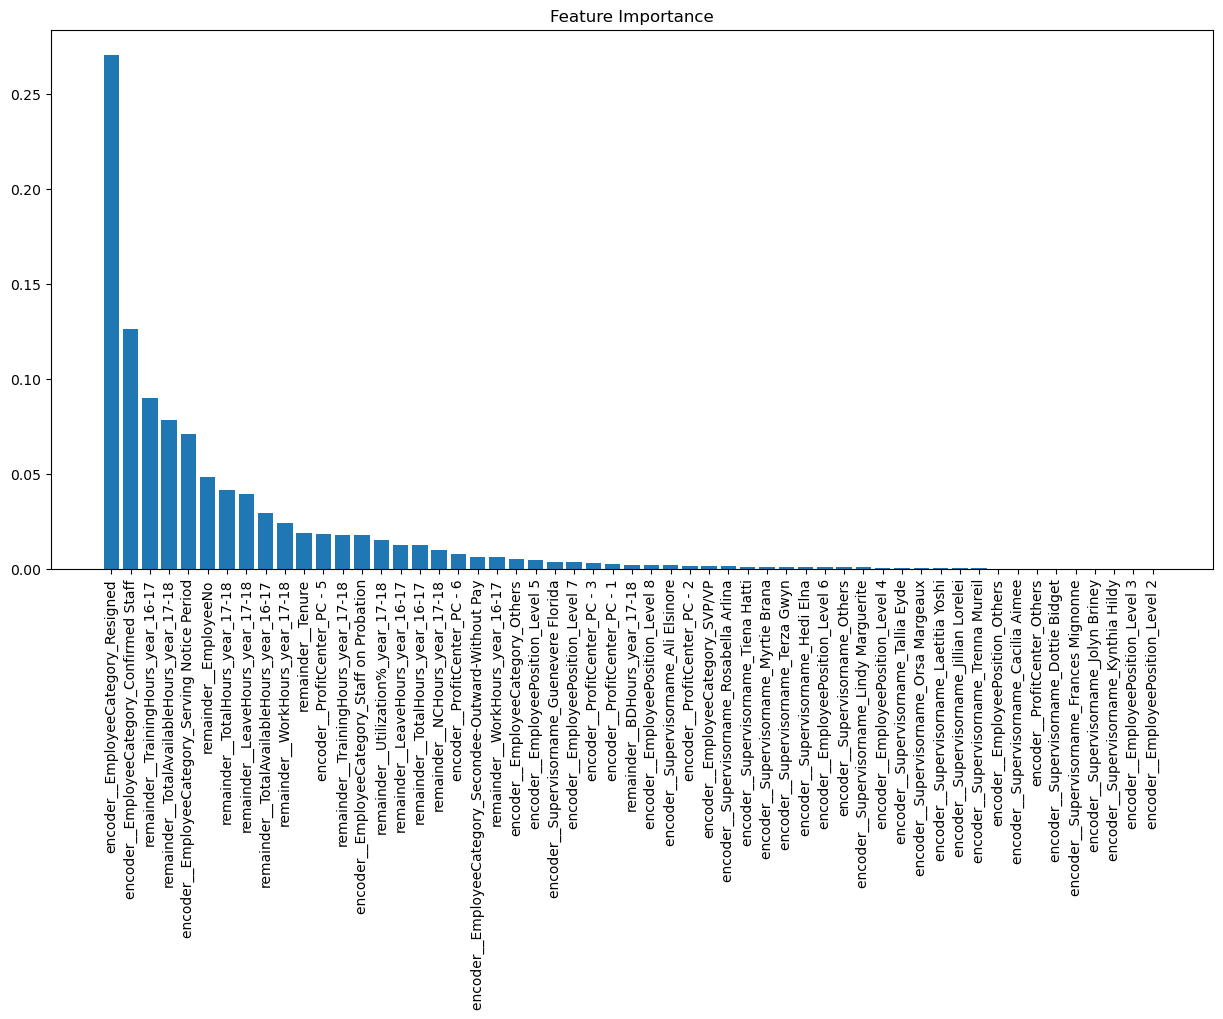

In [14]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [train_X.columns[i] for i in indices if i < len(train_X.columns)]

plt.figure(figsize=(15, 7))
plt.title("Feature Importance")
plt.bar(range(len(names)), importances[indices][:len(names)])
plt.xticks(range(len(names)), names, rotation=90)
plt.show()


In [15]:
from sklearn.feature_selection import SelectFromModel


sfm=SelectFromModel(clf,max_features =10,threshold=-np.inf)
sfm.fit(train_X,train_y)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10, n_jobs=-1,
                                                 random_state=0),
                max_features=10, threshold=-inf)

In [16]:
selected_features=[]
for feature_list_index in sfm.get_support(indices=True):
    selected_features.append(feat_labels[feature_list_index])

In [17]:
selected_features

['encoder__EmployeeCategory_Confirmed Staff',
 'encoder__EmployeeCategory_Resigned',
 'encoder__EmployeeCategory_Serving Notice Period',
 'remainder__EmployeeNo',
 'remainder__TotalAvailableHours_year_16-17',
 'remainder__TrainingHours_year_16-17',
 'remainder__TotalHours_year_17-18',
 'remainder__TotalAvailableHours_year_17-18',
 'remainder__WorkHours_year_17-18',
 'remainder__LeaveHours_year_17-18']

In [18]:
train_X= pd.DataFrame(sfm.transform(train_X))
test_X= pd.DataFrame(sfm.transform(test_X))

In [19]:
print(train_X.shape)
print(test_X.shape)

(875, 10)
(219, 10)


### Model Building

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score,f1_score,recall_score,accuracy_score,confusion_matrix

In [21]:
def Model_Result(actual, pred):
    print("Confusion Matrix")
    confusion = confusion_matrix(actual, pred)
    print(confusion)
    print("**********************************************************")
    accuracy = accuracy_score(actual, pred)
    recall = recall_score(actual, pred, pos_label='Active')
    precision = precision_score(actual, pred, pos_label='Active')
    f1 = f1_score(actual, pred, pos_label='Active')

    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1 Score: {f1}")

    metrics = {
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision,
        'f1': f1
    }

    #return metrics

In [22]:
validation_dict={}
def different_model(model):
    ml=model
    
    ml.fit(train_X,train_y)
    
    pred_y = ml.predict(test_X)
    
    return_list=Model_Result(test_y,pred_y)
    validation_dict[model]=return_list

In [23]:
# Logistics regression
different_model(LogisticRegression(random_state=2))

Confusion Matrix
[[170   3]
 [  1  45]]
**********************************************************
Accuracy: 0.9817351598173516
Recall: 0.9826589595375722
Precision: 0.9941520467836257
F1 Score: 0.9883720930232557


In [24]:
# DecisionTreeClassifier
different_model(DecisionTreeClassifier())

Confusion Matrix
[[172   1]
 [  1  45]]
**********************************************************
Accuracy: 0.9908675799086758
Recall: 0.9942196531791907
Precision: 0.9942196531791907
F1 Score: 0.9942196531791907


In [25]:
# RandomForestClassifier
different_model(RandomForestClassifier(random_state=1))

Confusion Matrix
[[173   0]
 [  1  45]]
**********************************************************
Accuracy: 0.9954337899543378
Recall: 1.0
Precision: 0.9942528735632183
F1 Score: 0.9971181556195965


In [26]:
# KNeighborsClassifier
different_model(KNeighborsClassifier())

Confusion Matrix
[[163  10]
 [ 33  13]]
**********************************************************
Accuracy: 0.8036529680365296
Recall: 0.9421965317919075
Precision: 0.8316326530612245
F1 Score: 0.8834688346883469


In [27]:
# gradient boosting 
different_model(GradientBoostingClassifier())

Confusion Matrix
[[173   0]
 [  1  45]]
**********************************************************
Accuracy: 0.9954337899543378
Recall: 1.0
Precision: 0.9942528735632183
F1 Score: 0.9971181556195965


## Final Model 

**I have achieved the best results using the Random Forest algorithm, so I have selected it for my prediction.**

In [28]:
RF=RandomForestClassifier()
RF_M=RF.fit(train_X,train_y)
pred_y=RF_M.predict(test_X)

In [29]:
# displaying the predicted values for the first 10 samples in the pred_y
pred_y[0:10]

array(['Active', 'Active', 'Active', 'Active', 'Active', 'Active',
       'Active', 'Resigned', 'Active', 'Active'], dtype=object)

In [30]:
test_y[0:10]

886       Active
859       Active
0         Active
995       Active
1066      Active
40        Active
908       Active
373     Resigned
663       Active
372       Active
Name: remainder__CurrentStatus, dtype: object

In [31]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
# Classification Report :
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

      Active       1.00      1.00      1.00       173
    Resigned       1.00      1.00      1.00        46

    accuracy                           1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219



### Risk Analysis

In [32]:
# Probability of Attrition :
# calculates the probability of attrition using the trained Random Forest model
y_prob = RF_M.predict_proba(test_X)[:,0]

In [33]:
# This line creates a new DataFrame called Data.
# It takes the y_prob array as the data and assigns the column name "Resigned_prob" to the column in the DataFrame.
Data = pd.DataFrame(y_prob,columns=["Resigned_prob"])

In [34]:
# create new col
Data["Employee_ID"]=test_X[3]

In [35]:
# Employees can be assigning a "Risk Category" based on the probability such that:

# Low-risk    : < 0.6
# Medium-risk :  between 0.6 and 0.8
# High-risk   : > 0.8

In [36]:
Data["Risk Category"] = 0
for i in range(Data.shape[0]) :
    if(Data["Resigned_prob"][i]<0.6) :
        Data["Risk Category"][i] = "Low-risk"
    elif((Data["Resigned_prob"][i]>=0.6) and (Data["Resigned_prob"][i]<=0.8)) :
        Data["Risk Category"][i] = "Medium-risk"
    else :
        Data["Risk Category"][i] = "High-risk"

In [37]:
Data=Data[["Employee_ID", "Resigned_prob", "Risk Category"]]

In [38]:
Data.sample(5)

,Employee_ID,Resigned_prob,Risk Category
109,346,0.01,Low-risk
179,779,1.00,High-risk
28,772,1.00,High-risk
60,775,1.00,High-risk
89,865,1.00,High-risk


In [42]:
Data['Risk Category'].value_counts()

High-risk      169
Low-risk        46
Medium-risk      4
Name: Risk Category, dtype: int64

**High-risk: There are 169 employees identified as high-risk in terms of attrition.**

**When employees leave, it results in a loss of institutional knowledge, experience, and skills, leading to decreased productivity and efficiency. Additionally, the process of hiring and training new employees to fill vacant positions incurs significant costs in terms of time, resources, and money.**

### Strategies to retain high-performing employees

Improve employee satisfaction by creating a positive work environment.

Offer competitive compensation and benefits packages to attract and retain top talent.

Provide opportunities for professional growth and development through training and mentorship programs.

Recognize and reward employee achievements to boost morale and motivation.

Implement work-life balance initiatives to promote well-being and reduce burnout.Offer flexible work arrangements, such as remote work options or flexible hours, to accommodate individual needs.

Enhance team collaboration and foster a sense of belonging through team-building activities and social events.

Ensure clear job expectations and align employee goals with organizational objectives to enhance engagement.